## Plotting data

Building on our previous example, let's get some data that we can plot.

Let's try to plot:

* A histogram of word lengths -- how many 1-letter, 2-letter, 3-letter words etc.
* A histogram of sentence lengths (number of words)
* A plot which compares the length of a word against the number of words in the sentence it's contained in (so we can look at e.g. do longer sentences tend to contain longer words).

We need to generate some data! For our first example, the data will be counts of each word length (how many 1-letter, 2-letter, 3-letter words etc.)

As before `Counter` will do this for us. Here's a function to generate the data:

In [1]:
from collections import Counter

def word_length_counts(text):
    words = text.split()
    lengths = [len(word) for word in words]
    return Counter(lengths)

Try this out:

In [2]:
print(word_length_counts("This is a test of word length counts!"))

Counter({4: 3, 2: 2, 1: 1, 6: 1, 7: 1})


## List comprehensions

This adds a new Python structure called a *list comprehension*. It's not essential that you understand it completely right now, just note that:

```python
lengths = [len(word) for word in words]
```

is equivalent to:

```python
lengths = []
for word in words:
    lengths.append(len(word))
```

The meaning in each case is "calculate the length of each `word` in `words`".

There's more detail and an exercise on this in worksheet A3, if you're interested.

## A first data plot

Let's look at making a scatter plot of some data points. Here's the documentation:

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter

By convention we import seaborn as:

```python
import matplotlib.pyplot as plt
```

The use of `as` means that we refer to `plt` rather than `matplotlib.pyplot`.

So instead of calling the function for a plot like this:

```python
matplotlib.pyplot.scatter(....
```

we can call it like this:

```python
matplotlib.pyplot.scatter(....
```

This makes the code more succinct.

Here's an example of making a plot:

```python
%matplotlib inline
import matplotlib.pyplot as plt
x_data = [1, 2, 3, 4, 5]
y_data = [16, 4, 2, 8, 1]
plt.scatter(x_data, y_data, color="red")
```

Try it out! Note the important line:

```python
%matplotlib inline
```

This tells Jupyter to show the plot inside the notebook.

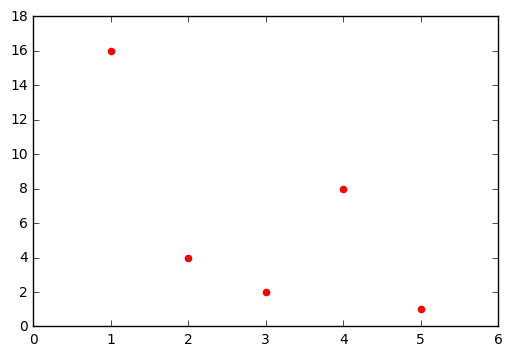

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
x_data = [1, 2, 3, 4, 5]
y_data = [16, 4, 2, 8, 1]
plt.scatter(x_data, y_data, color="red")


## Everything is data

As you might expect we can use data for more than just the `x` and `y` coordinates in the plot. What if we have a third variable that we want to represent somehow?

For example, we can use the size of the marker to show a third variable:

```python
q_data = [10, 18, 42, 22, 33]
plt.scatter(x_data, y_data, s=q_data)
```

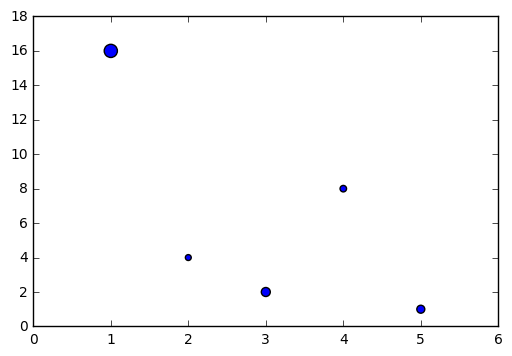

In [5]:
q_data = [90, 18, 42, 22, 33]
plt.scatter(x_data, y_data, s=q_data)

## Exercise: Real data!

First, run the function defined above, `word_length_counts()`, on our example text. Keep the `Counter` you get as a result in a variable called `counts`.

In [6]:
input_file = open("reason.txt","r")
text = input_file.read()
counts = word_length_counts(text)

Remember that this `Counter` is similar to a Python dictionary. To plot it as a histogram, we can use a `matplotlib` bar chart. (`matplotlib` does have a histogram function more suitable for continuous data).

The `matplotlib` `bar()` function, though, is just expecting two lists of numbers! Here's an example, try it out:

```python
plt.bar([1, 2, 3, 4],[99, 74, 33, 12, 18])
```

<Container object of 5 artists>

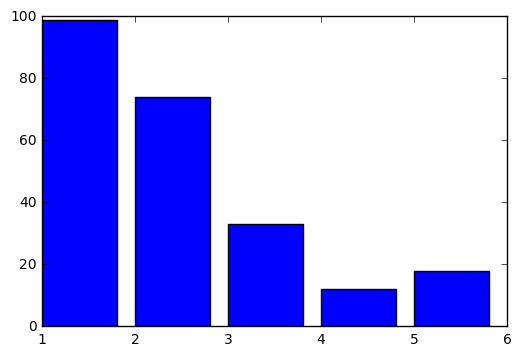

In [8]:
plt.bar([1, 2, 3, 4, 5],[99, 74, 33, 12, 18])

So we want to convert our data into two lists of numbers for plotting:

* The first list (the x axis) is just the numbers from 1 to the number of letters in the longest word
* The second list (the bar heights in the plot) is the corresponding count of that length of word

Write a function, `counts_for_plotting`,  which takes a `Counter` and then returns this second list, the bar heights in the plot. (The first list is just a `range()` with the length of the second list, so we don't need to return it).

To do this:

* Create a list for `x` from 1 to the number of letters in the longest word, using `range()`
 * Since the `Counter` is like a dictionary, you can get the word lengths with the `keys()` method
 * So, you can get the length of the longest word with `max(counts.keys())`
 * Remember that to go up to that number in a `range()` you'll have to add one

* Create an empty list for `y` (bar heights)

* Now loop through the `x` list
 * For each `x`, get the count of that word length from your `Counter` and append it to the `y` list.
 * To append something to a list use e.g. `my_list.append()`
 * Note that if that word length has not been seen yet, the `Counter` will return zero
 
This is possible as a list comprehension so give that a try if you want!

In [17]:
# using a loop
def counts_for_plotting(counts):
    result = []
    for x in range(max(counts.keys())):
        result.append(counts[x])
        
# using a list comprehension
def counts_for_plotting(counts):
    return [counts[x] for x in range(max(counts.keys())+1)]

Now test your function:

In [18]:
print(counts_for_plotting(counts))

[0, 5952, 47960, 38334, 24744, 18330, 14742, 13215, 10699, 11578, 10181, 6836, 3319, 2248, 1692, 553, 257, 138, 84, 91, 30, 26, 18, 7, 7, 3, 5, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]


## Exercise: Plotting the data

Have a look at the documentation for `bar()`:

http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar

Now that you have your data, you can simply plot it with:

```python
y = counts_for_plotting(counts)
plt.bar(range(1,len(y)+1), y)
```

<Container object of 37 artists>

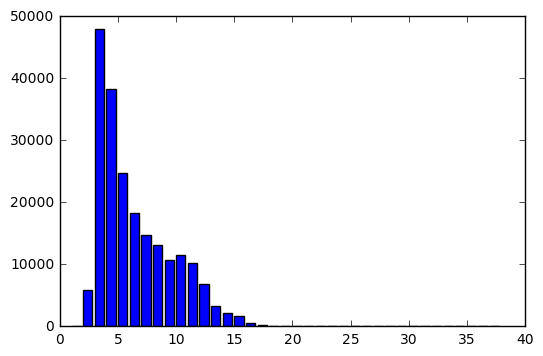

In [20]:
y = counts_for_plotting(counts)
plt.bar(range(1,len(y)+1), y)

However this isn't a very attractive plot! Some suggestions:

* Add a title with `plt.title()`
* Change the bar colour
* Change the bar width so there isn't a gap between bars
* Label the axes with `plt.xlabel()` and `plt.ylabel()`

And more advanced:

* Make the y-axis a log scale

Try these out to finish off your plot.

## Exercise: Sentence lengths

For this exercise we're going back a little to last week -- this will generate some more data you can use.

Write a function which takes a filename, and counts the number of words per sentence. As above with word lengths, the function should return a `Counter`.

For simplicity, assume that:

* A sentence is always the text between a full stop "." and the next full stop.
* A "word" is always the text between a space " " and the next space.

Some notes:

* First think about how you would separate the text into sentences.
* Then think about how you would measure the length of each sentence.
* Make a list of sentence lengths, then feed it to `Counter`.
* You'll use `split()` (a lot).
* You could use a text cleaning function if you want, though you'll have to make sure to preserve full stops in the text.
* As with the previous exercise, you could use a loop or a list comprehension

In [35]:
# with a loop
def sentence_lengths(filename):
    f = open(filename,"r")
    text = f.read()
    result = []
    for sentence in text.split("."):
        words = sentence.split()
        result.append(len(words))
    return Counter(result)
        
# with a list comprehension
def sentence_lengths(filename):
    text = open(filename,"r").read()
    return Counter([len(sentence.split()) for sentence in text.split(".")])       

Now you can:

* use `counts_for_plotting()` to get the data in a format you can plot
* plot this the same way as the word lengths, using a histogram.

<Container object of 233 artists>

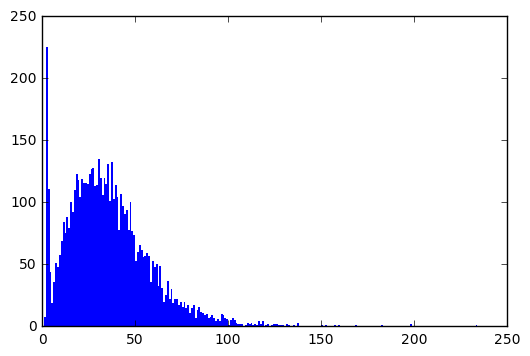

In [30]:
counts = sentence_lengths("reason.txt")
y = counts_for_plotting(counts)
plt.bar(range(1,len(y)+1), y, width=1, linewidth=0)

In [ ]:
def clean_for_sentence(text):
    result = ""
    for character in text:
        if character.isalpha():
            result += character
        elif character in ".?!":
            # all of these end sentences, replace with . so we can split on this
            result += "."
        else:
            result += " "
    return result
            
def word_length_vs_sentence_length(filename):
    text = open(filename,"r").read()
    text = clean_for_sentence(text)
    sentence_lengths = []
    longest_word_lengths = []
    for sentence in text.split("."):
        words = sentence.split()
        if len(words) > 0:
            longest_word_lengths.append(max(len(word) for word in words))
            sentence_lengths.append(len(words))
    return longest_word_lengths, sentence_lengths

In [ ]:
w_lengths, s_lengths = word_length_vs_sentence_length("reason.txt")
plt.scatter(w_lengths, s_lengths, s=2, alpha=0.2, color='black')
plt.xlabel("Length of longest word")
plt.ylabel("Length of sentence")
plt.ylim(0,200)

In [ ]:
a = plt.hist2d(w_lengths, s_lengths, bins=(max(w_lengths),max(s_lengths)/4))
plt.grid(False)